# RIO125 - Classification Model - Drug Side Effects

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("webmd.csv")
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## Basic Details of Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [4]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [5]:
data.shape

(362806, 12)

In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

## Data Preprocessing

In [8]:
#Checking missing values
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [9]:
data.Reviews.nunique()

250167

In [10]:
#Since Reviews is having more than half of the values as unique we can neglect this column.
data.drop("Reviews",axis=1,inplace=True) 

In [11]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,1,Male,,1


In [12]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [13]:
data.apply(lambda x: len(x.unique()))

Age                12
Condition        1806
Date             4524
Drug             7093
DrugId           6572
EaseofUse           7
Effectiveness       7
Satisfaction        7
Sex                 3
Sides            1651
UsefulCount       148
dtype: int64

In [14]:
# check for categorical attributes

cat_col = []
for x in data:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Age', 'Condition', 'Date', 'Drug', 'Sex', 'Sides']

In [15]:
data.Drug.nunique()

7093

In [16]:
#unique number of side effects.
data.Sides.nunique()

1651

In [17]:
data.Drug.mode()
#cymbalta is the most occuring drug

0    cymbalta
dtype: object

In [18]:
data['Drug'].value_counts()

cymbalta                              4648
lisinopril solution                   4269
lisinopril                            4269
lexapro                               4134
hydrocodone-acetaminophen             3944
                                      ... 
ec-naprosyn                              1
lamisil at cream                         1
pulmocare                                1
aloe-la-ceramide-silicone-tape kit       1
mekinist                                 1
Name: Drug, Length: 7093, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Satisfaction   362806 non-null  int64 
 8   Sex            362806 non-null  object
 9   Sides          362806 non-null  object
 10  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 30.4+ MB


## Selection of Drug:We are selecting the dataset of drug named 'cymbalta' with DrugId =91491 .Because it is having the most occurences.

In [20]:
data=data.drop(data.loc[(data['Drug']!='cymbalta')].index)

In [21]:
data.shape

(4648, 11)

In [22]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount
314212,,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,5,,"Nausea , dry mouth , constipation , loss of ...",12
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,1,Male,"Nausea , dry mouth , constipation , loss of ...",0
314223,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,5,,"Nausea , dry mouth , constipation , loss of ...",0
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,2,Female,"Nausea , dry mouth , constipation , loss of ...",0
314246,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,2,,"Nausea , dry mouth , constipation , loss of ...",1


In [23]:
data.Sides.nunique()

1

In [24]:
data['Sides'].value_counts()

Nausea ,  dry mouth ,  constipation , loss of appetite, tiredness, drowsiness, or increased  sweating  may occur.    4648
Name: Sides, dtype: int64

In [25]:
data['Satisfaction'].value_counts()

1    1490
5    1268
4     852
3     646
2     392
Name: Satisfaction, dtype: int64

In [26]:
data['UsefulCount'].unique()

array([ 12,   0,   1,   2,  11,  22,   3,  15,  27,  30,   4,   5,  19,
        28,  21,  36,  35,  34,  25,   8,   7,  18,  39,   9,  56,  29,
        71,  23,   6,  32,  24,  17,  13,  14,  10,  16,  20,  42, 103,
        38,  33,  26,  61,  41,  93,  90, 134, 145,  51,  43,  48,  31,
        82,  58,  46,  47,  45,  44,  60,  50, 116,  40,  65,  97,  77,
       129,  68,  59,  37], dtype=int64)

In [27]:
data['Date'].nunique()

2189

In [28]:
data['EaseofUse'].value_counts()

5    2502
4     998
3     484
1     476
2     188
Name: EaseofUse, dtype: int64

Here we can drop the columns of Drug,Drug id ,sides because it is common. The other columns such as date can also be dropped.

In [29]:
data=data.drop(['Date','Drug','DrugId','Sides'],axis=1)

In [30]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
314212,,Major Depressive Disorder,5,5,5,,12
314216,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0
314223,45-54,Anxiousness associated with Depression,5,5,5,,0
314235,35-44,Anxiousness associated with Depression,3,3,2,Female,0
314246,55-64,Chronic Muscle or Bone Pain,2,2,2,,1


In [31]:
data.isna().sum()

Age              0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
UsefulCount      0
dtype: int64

## Handling Missing Values

In [32]:
data['Age'].value_counts()
#there is a blank space ,so we can fill it with a value 3-6
# change the value 07 - Dec to 7-12

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
               118
75 or over     102
13-18           34
7-12             1
0-2              1
Name: Age, dtype: int64

In [33]:
data['Age'].replace(to_replace = [' '], value = '3-6', inplace = True)

In [34]:
data['Age'].replace(to_replace = ['07-Dec'], value = '7-12', inplace = True)

In [35]:
data['Age'].value_counts()

45-54         1291
55-64         1008
35-44          874
25-34          594
65-74          400
19-24          225
3-6            118
75 or over     102
13-18           34
7-12             1
0-2              1
Name: Age, dtype: int64

In [36]:
data["Sex"].replace(to_replace = [' '], value = 'Male', inplace = True)

In [37]:
data['Sex'].value_counts()

Female    3621
Male      1027
Name: Sex, dtype: int64

## Correlation Matrix

<AxesSubplot:>

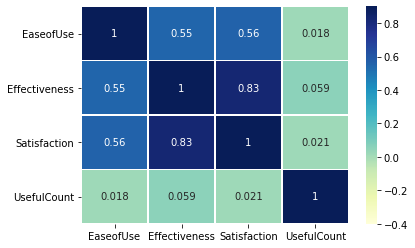

In [38]:
#CHECKING CORRELATION
corrmatrix = data.corr()

sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

HIGH LEVEL OF CORRELATION IS SEEN WITH EFFECTIVENESS AND SATISFACTION IN THE GRAPH

In [39]:
data_cpy =data

## Outlier Detection

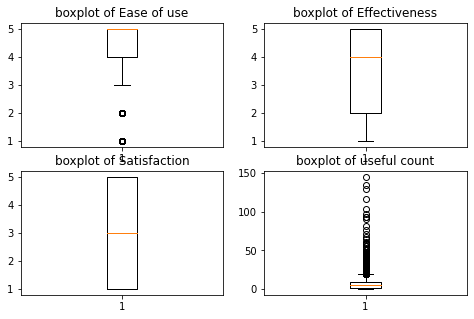

In [40]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.boxplot(data["EaseofUse"])
plt.title("boxplot of Ease of use")

plt.subplot(2,2,2)
plt.boxplot(data["Effectiveness"])
plt.title("boxplot of Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data["Satisfaction"])
plt.title("boxplot of Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data["UsefulCount"])
plt.title("boxplot of useful count")
plt.show()

There are outliers in useful count and ease of use

In [41]:
Q1=np.percentile(data["UsefulCount"],25,interpolation="midpoint")
Q3=np.percentile(data["UsefulCount"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= -8.5
upperlimit =  19.5


In [42]:
outlier = []
for x in data['UsefulCount']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier

[22,
 27,
 30,
 30,
 28,
 21,
 36,
 35,
 34,
 25,
 39,
 56,
 29,
 71,
 23,
 29,
 21,
 32,
 24,
 22,
 21,
 25,
 21,
 25,
 32,
 22,
 30,
 20,
 42,
 30,
 22,
 103,
 38,
 28,
 30,
 33,
 26,
 61,
 25,
 26,
 28,
 41,
 93,
 90,
 134,
 145,
 51,
 27,
 29,
 43,
 39,
 30,
 22,
 21,
 35,
 33,
 48,
 36,
 56,
 27,
 38,
 21,
 24,
 30,
 22,
 22,
 21,
 31,
 21,
 21,
 25,
 93,
 24,
 31,
 35,
 82,
 20,
 33,
 25,
 58,
 20,
 46,
 21,
 47,
 45,
 44,
 34,
 60,
 48,
 26,
 29,
 50,
 36,
 20,
 25,
 47,
 20,
 20,
 23,
 41,
 26,
 21,
 22,
 25,
 21,
 23,
 22,
 28,
 22,
 21,
 28,
 20,
 42,
 27,
 20,
 28,
 22,
 26,
 25,
 29,
 23,
 26,
 116,
 21,
 51,
 40,
 29,
 20,
 28,
 28,
 25,
 21,
 34,
 31,
 30,
 23,
 20,
 20,
 26,
 35,
 29,
 65,
 24,
 22,
 30,
 20,
 26,
 34,
 20,
 21,
 46,
 23,
 20,
 23,
 27,
 27,
 35,
 21,
 25,
 20,
 21,
 21,
 28,
 97,
 23,
 23,
 22,
 33,
 56,
 45,
 22,
 39,
 21,
 23,
 41,
 77,
 31,
 129,
 24,
 22,
 20,
 31,
 24,
 34,
 22,
 20,
 21,
 23,
 24,
 21,
 22,
 22,
 21,
 20,
 29,
 22,
 22,
 23,
 20,


In [43]:
data=data.drop(data.loc[data["UsefulCount"]>upper].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x19ba122c430>,
 'caps': [<matplotlib.lines.Line2D at 0x19ba122caf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ba122c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ba12391f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ba1239550>],
 'means': []}

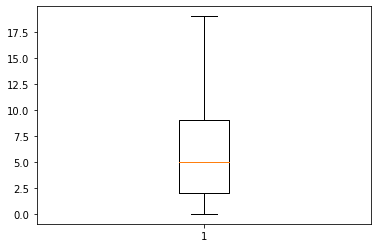

In [44]:
plt.boxplot(data["UsefulCount"])

Now the outliers in Useful Count is removed.

In [45]:
Q1=np.percentile(data["EaseofUse"],25,interpolation="midpoint")
Q3=np.percentile(data["EaseofUse"],75,interpolation="midpoint")
IQR=Q3-Q1
low=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print("lower limit=",low)
print("upperlimit = ",upper)

lower limit= 2.5
upperlimit =  6.5


In [46]:
outlier = []
for x in data['EaseofUse']:
    if((x>upper)or(x<low)):
        outlier.append(x)
outlier

[2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,


In [47]:
data=data.drop(data.loc[data["EaseofUse"]>upper].index)
data=data.drop(data.loc[data["EaseofUse"]<low].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x19ba128f940>,
 'caps': [<matplotlib.lines.Line2D at 0x19ba129b040>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ba128f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x19ba129b700>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ba129ba60>],
 'means': []}

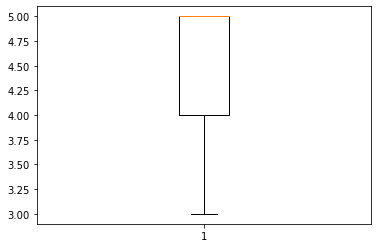

In [48]:
plt.boxplot(data["EaseofUse"])

Now we have removed all the outliers from the columns useful count and ease of use

In [49]:
data.shape

(3769, 7)

In [50]:
data_cpy.shape

(4648, 7)

In [51]:
#adding index column
list2=list(range(3769))
data=data.set_index([list2])

list3 = list(range(4648))
data_cpy=data_cpy.set_index([list3])

In [52]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,3-6,Major Depressive Disorder,5,5,5,Male,12
1,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0
2,45-54,Anxiousness associated with Depression,5,5,5,Male,0
3,35-44,Anxiousness associated with Depression,3,3,2,Female,0
4,55-64,Anxiousness associated with Depression,3,3,1,Male,1


In [53]:
data_cpy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,3-6,Major Depressive Disorder,5,5,5,Male,12
1,45-54,Repeated Episodes of Anxiety,3,1,1,Male,0
2,45-54,Anxiousness associated with Depression,5,5,5,Male,0
3,35-44,Anxiousness associated with Depression,3,3,2,Female,0
4,55-64,Chronic Muscle or Bone Pain,2,2,2,Male,1


### Recode the values of Effectiveness to a categorical values.

In [54]:
data['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [1], value =['extreme severe side effects'], inplace = True)

In [55]:
data['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [2], value =['severe side effects'], inplace = True)

In [56]:
data['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [3], value =['moderate side effects'], inplace = True)

In [57]:
data['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [4], value =['mild side effects'], inplace = True)

In [58]:
data['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

data_cpy['Effectiveness'].replace(to_replace = [5], value =['no side effects'], inplace = True)

In [59]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,3-6,Major Depressive Disorder,5,no side effects,5,Male,12
1,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,Male,0
2,45-54,Anxiousness associated with Depression,5,no side effects,5,Male,0
3,35-44,Anxiousness associated with Depression,3,moderate side effects,2,Female,0
4,55-64,Anxiousness associated with Depression,3,moderate side effects,1,Male,1


In [60]:
data_cpy.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,3-6,Major Depressive Disorder,5,no side effects,5,Male,12
1,45-54,Repeated Episodes of Anxiety,3,extreme severe side effects,1,Male,0
2,45-54,Anxiousness associated with Depression,5,no side effects,5,Male,0
3,35-44,Anxiousness associated with Depression,3,moderate side effects,2,Female,0
4,55-64,Chronic Muscle or Bone Pain,2,severe side effects,2,Male,1


# Visualizations

## Catplot of Satisfaction with respect to Sex column

<Figure size 1080x1440 with 0 Axes>

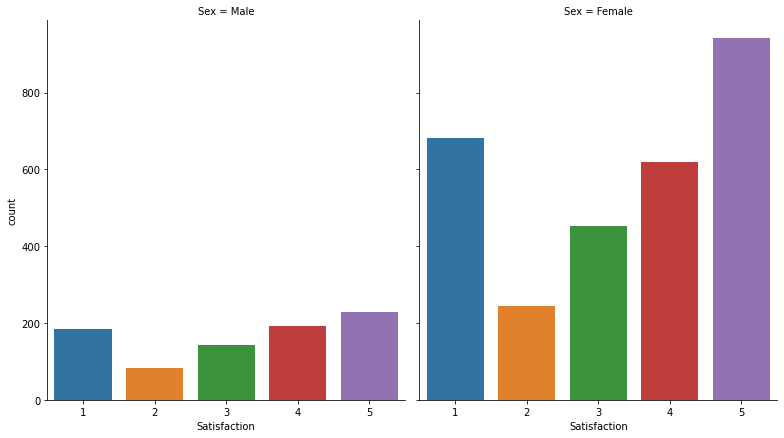

In [61]:
plt.figure(figsize=(15,20))
g = sns.catplot(x="Satisfaction",col="Sex",
                data=data, kind="count",
                height=6,aspect =.9);

## Pie chart of Percentage of Effectiveness

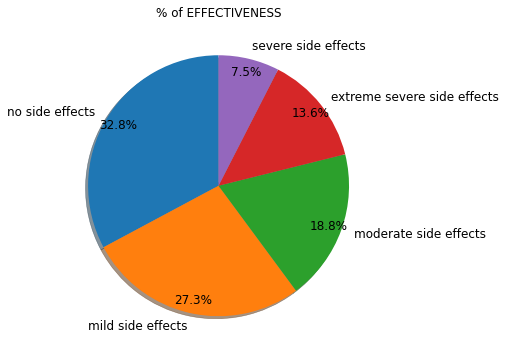

In [62]:
plt.figure(figsize=(10,6))
plt.title('% of EFFECTIVENESS')
tr = pd.DataFrame(data['Effectiveness'].value_counts())
tr_names = tr.index
count = tr['Effectiveness']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1,shadow=True, startangle=90)

plt.show()

## Pie Chart of Percentage of different conditions of People

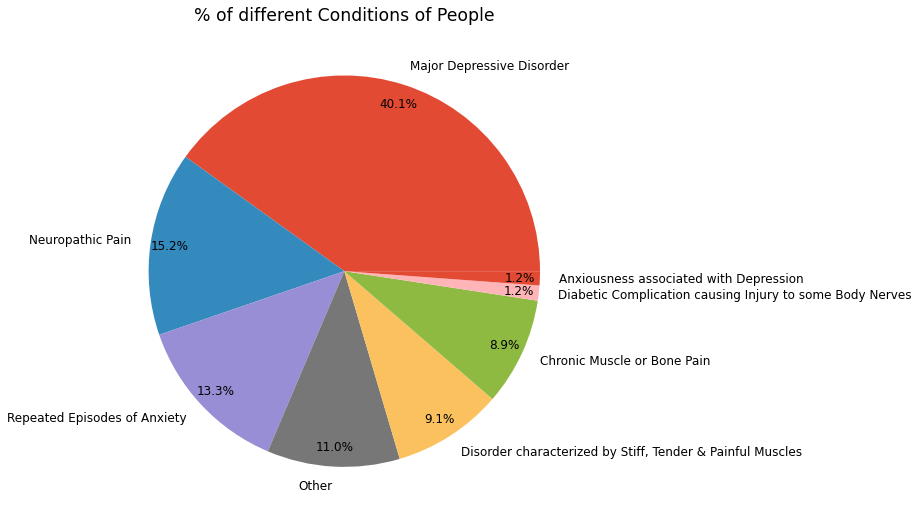

In [63]:
plt.figure(figsize=(15,9))
plt.title('% of different Conditions of People')
tr = pd.DataFrame(data['Condition'].value_counts())
tr_names = tr.index
count = tr['Condition']
plt.style.use('ggplot')
plt.rc('font', size=12)
plt.pie(count, autopct='%1.1f%%', labels = tr_names, pctdistance=0.9, labeldistance=1.1)

plt.show()

## Count plot of various Age groups taken for this and their sex

<module 'matplotlib.pyplot' from 'C:\\Users\\maj\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

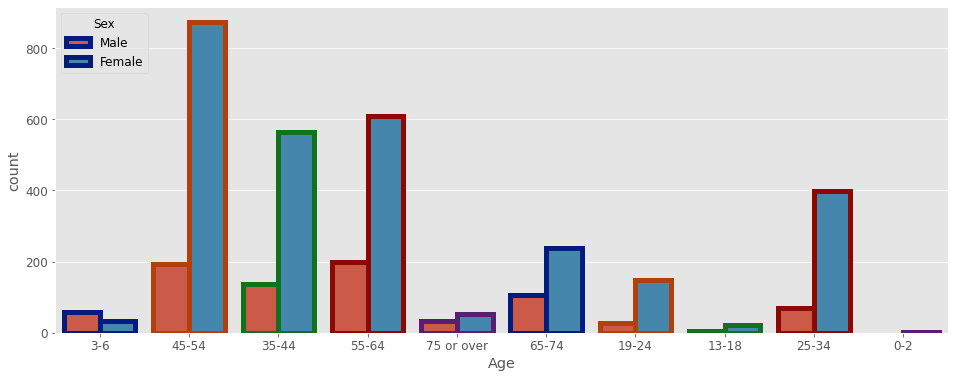

In [64]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Age",hue = "Sex" ,edgecolor=sns.color_palette("dark", 5),data=data,
                   linewidth=5,)
plt

The age group 45-54 is consuming this Drug more and a higher ratio of males consume this.

## Effect of Drug on Age group 45-54(most commonly used by)

In [65]:
dt=data.loc[(data['Age']=="45-54")]

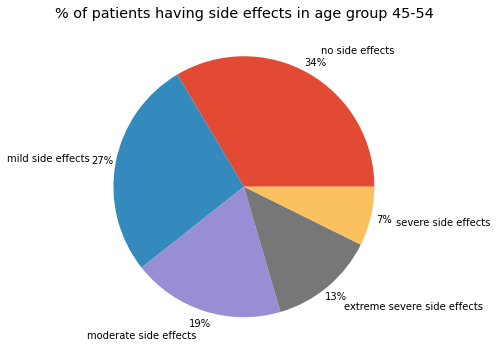

In [66]:
tr = pd.DataFrame(dt['Effectiveness'].value_counts())
tr_names = tr.index
count=tr['Effectiveness']

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = tr_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of patients having side effects in age group 45-54')
plt.show()

## Scatter plot of relating variables Satisfaction with Sex

<Figure size 720x1080 with 0 Axes>

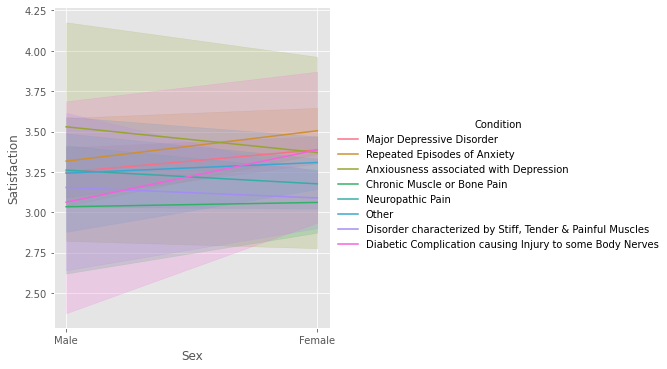

In [67]:
plt.figure(figsize=(10,15))
sns.relplot(y="Satisfaction", x="Sex",hue="Condition" ,kind="line",
            dashes=False, markers=True,data=data);

## Label Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ["Age","Condition","Sex"]:
    data[col]=label.fit_transform(data[col])
    data_cpy[col]=label.fit_transform(data_cpy[col])
datastand=data

In [69]:
data.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,Sex,UsefulCount
0,4,4,5,no side effects,5,1,12
1,6,7,3,extreme severe side effects,1,1,0
2,6,0,5,no side effects,5,1,0
3,5,0,3,moderate side effects,2,0,0
4,7,0,3,moderate side effects,1,1,1


## Data Splitting

In [70]:
y=data['Effectiveness']
x=data.drop(['Effectiveness'],axis=1)
x1=x
x2=x

ycp=data_cpy['Effectiveness']
xcp=data_cpy.drop(['Effectiveness'],axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1)



xcp_train,xcp_test,ycp_train,ycp_test=train_test_split(xcp,ycp,random_state=42,test_size=0.1)

In [72]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix